<a href="https://colab.research.google.com/github/Nikitaj184/ML_Image-Recognition/blob/main/2)_Preprocessing_and_Augmentation_Industrial_Defect_checkpoint.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Importing the Libraries

In [2]:
import os as ind_defect_os
import cv2 as ind_defect_cv2
import matplotlib.pyplot as ind_defect_mplt
import numpy as ind_defect_npy
from sklearn.model_selection import train_test_split as ind_defect_tnttsplit
from tensorflow.keras.preprocessing.image import ImageDataGenerator  as ind_defect_IMGData_Gen
import warnings as ind_defect_wr
ind_defect_wr.filterwarnings('ignore')

### Data Loading

In [3]:
defective_casting_pdt_pathh  = '/content/drive/My Drive/Casting_Product_Data/def_front'
good_casting_pdt_pathh       = '/content/drive/My Drive/Casting_Product_Data/ok_front'

defective_casting_img = ind_defect_os.listdir(defective_casting_pdt_pathh)
good_casting_img = ind_defect_os.listdir(good_casting_pdt_pathh)
print(f"Total number of Defective Casting product images    : {len(defective_casting_img)}")
print(f"Total number of Non-Defective Casting product images: {len(good_casting_img)}")

Total number of Defective Casting product images    : 781
Total number of Non-Defective Casting product images: 519


### Preprocessing Defective and Non-Defective Images

In [4]:
# Function to preprocess casting product images
def casting_product_preproces(folder_path, image_list, label, target_size=(224, 224)):
    ind_products = []
    ind_categories = []

    for castingfile in image_list:
        castingpath = ind_defect_os.path.join(folder_path, castingfile)
        ind_product = ind_defect_cv2.imread(castingpath)

        # Skip if the image is not readable
        if ind_product is None:
            continue

        # Convert to grayscale
        ind_grayscaled = ind_defect_cv2.cvtColor(ind_product, ind_defect_cv2.COLOR_BGR2GRAY)

        # Resize image to target dimensions (224x224)
        ind_remeasured = ind_defect_cv2.resize(ind_grayscaled, target_size)

        # Add a channel dimension to match model input requirements (e.g., (224, 224, 1))
        ind_enlarged = ind_defect_npy.expand_dims(ind_remeasured, axis=-1)

        # Store processed image and corresponding label
        ind_products.append(ind_enlarged)
        ind_categories.append(label)

    return ind_defect_npy.array(ind_products), ind_defect_npy.array(ind_categories)

# Preprocessing defective and non-defective images
defective_input_X, defective_output_Y = casting_product_preproces(defective_casting_pdt_pathh, defective_casting_img, label=1)
non_defective_input_X, non_defective_output_Y = casting_product_preproces(good_casting_pdt_pathh, good_casting_img, label=0)

# Combine both defective and non-defective datasets
ind_input = ind_defect_npy.concatenate((defective_input_X, non_defective_input_X), axis=0)
ind_output = ind_defect_npy.concatenate((defective_output_Y, non_defective_output_Y), axis=0)

print("Input dataset shape :", ind_input.shape)
print("Output labels shape :", ind_output.shape)

Input dataset shape : (1300, 224, 224, 1)
Output labels shape : (1300,)


### Data Augmentation

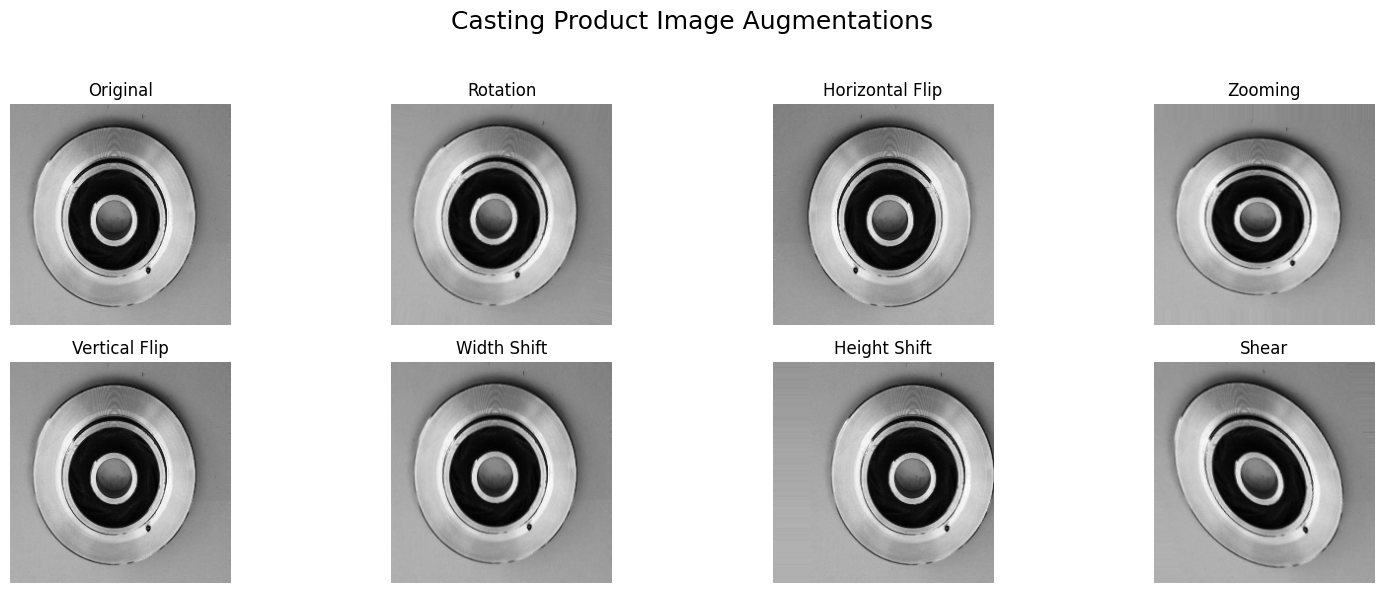

In [5]:
# Choose one base image for augmentation
indust_base_image = ind_input[0]  # shape: (224, 224, 1)
indust_base_image = ind_defect_npy.expand_dims(indust_base_image, axis=0)

# Define individual augmentation techniques
ind_augmentations = {
    'Original': ind_defect_IMGData_Gen(),  # No augmentation
    'Rotation': ind_defect_IMGData_Gen(rotation_range=30),
    'Horizontal Flip': ind_defect_IMGData_Gen(horizontal_flip=True),
    'Zooming': ind_defect_IMGData_Gen(zoom_range=0.3),
    'Vertical Flip': ind_defect_IMGData_Gen(vertical_flip=True),
    'Width Shift': ind_defect_IMGData_Gen(width_shift_range=0.2),
    'Height Shift': ind_defect_IMGData_Gen(height_shift_range=0.2),
    'Shear': ind_defect_IMGData_Gen(shear_range=20)
}

# Prepare subplot layout: 2 rows, 4 columns
indust_fig, indust_axes = ind_defect_mplt.subplots(2, 4, figsize=(16, 6))
indust_fig.suptitle("Casting Product Image Augmentations", fontsize=18)

# Flatten axes for easy indexing
ind_axes = indust_axes.flatten()

# Generate and plot each augmented image
for idx, (title, generator) in enumerate(ind_augmentations.items()):
    aug_img = next(generator.flow(indust_base_image, batch_size=1))
    ind_axes[idx].imshow(aug_img[0].reshape(224, 224), cmap='gist_gray')
    ind_axes[idx].set_title(title, fontsize=12)
    ind_axes[idx].axis('off')

ind_defect_mplt.tight_layout(rect=[0, 0, 1, 0.95])
ind_defect_mplt.show()